<a href="https://colab.research.google.com/github/RaiAnant/MangaChroma/blob/master/trainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!nvidia-smi

Sat Oct 12 15:45:28 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!rm -rf MangaChroma

In [0]:
!git clone https://github.com/RaiAnant/MangaChroma.git
!pip install import_ipynb
import import_ipynb

Cloning into 'MangaChroma'...
remote: Enumerating objects: 142, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 142 (delta 57), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (142/142), 40.11 KiB | 236.00 KiB/s, done.
Resolving deltas: 100% (57/57), done.
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2975 sha256=d4a72133c738b61eed223a59805d43c0408a7c8754c6c9f5652d439e8ec101a8
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [0]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='0'

In [0]:
from fastai.callbacks.tensorboard import ImageGenTensorboardWriter

To use this tracker, please run 'pip install tensorboardx'. Also you must have Tensorboard running to see results


NameError: ignored

In [0]:
import fastai
from fastai import *
from fastai.vision import *
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback
from fastai.vision.gan import *
from MangaChroma.fasterai.generators import *
from MangaChroma.fasterai.critics import *
from MangaChroma.fasterai.dataset import *
from MangaChroma.fasterai.loss import *
from MangaChroma.fasterai.save import *
from PIL import Image, ImageDraw, ImageFont
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
tbc=TensorBoardColab()

Using TensorFlow backend.


importing Jupyter notebook from /content/MangaChroma/fasterai/generators.ipynb
fatal: destination path 'MangaChroma' already exists and is not an empty directory.
importing Jupyter notebook from /content/MangaChroma/fasterai/unet.ipynb
fatal: destination path 'MangaChroma' already exists and is not an empty directory.
importing Jupyter notebook from /content/MangaChroma/fasterai/layers.ipynb
importing Jupyter notebook from /content/MangaChroma/fasterai/loss.ipynb
Sat Oct 12 15:46:34 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80    

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:05<00:00, 106MB/s]


importing Jupyter notebook from /content/MangaChroma/fasterai/critics.ipynb
Sat Oct 12 15:46:51 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    57W / 149W |    456MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Path Setup

In [0]:
path = Path('/content/drive/My Drive/Prototype_OP')
path_bw = path/'BW'
path_col = path/'Colored'

proj_id = 'OnePieceModel'

gen_name = proj_id + '_gen'
pre_gen_name = gen_name + '_0'
crit_name = proj_id + '_crit'

name_gen = proj_id + '_image_gen'
path_gen = path/name_gen

TENSORBOARD_PATH = Path('data/tensorboard/' + proj_id)

nf_factor = 1.5
pct_start = 1.

In [0]:
def get_data(bs:int, sz:int, keep_pct:float):
    return get_colorize_data(sz=sz, bs=bs, crappy_path=path_bw, good_path=path_col, 
                             random_seed=None, keep_pct=keep_pct)

def get_crit_data(classes, bs, sz):
    src = ImageList.from_folder(path, include=classes, recurse=True).random_split_by_pct(0.1, seed=42)
    ll = src.label_from_folder(classes=classes)
    data = (ll.transform(get_transforms(max_zoom=2.), size=sz)
           .databunch(bs=bs).normalize(imagenet_stats))
    return data

def create_training_images(fn,i):
    dest = path_bw/fn.relative_to(path_col)
    dest.parent.mkdir(parents=True, exist_ok=True)
    img = PIL.Image.open(fn).convert('LA').convert('RGB')
    img.save(dest)  
    
def save_preds(dl):
    i=0
    names = dl.dataset.items
    
    for b in dl:
        preds = learn_gen.pred_batch(batch=b, reconstruct=True)
        for o in preds:
            o.save(path_gen/names[i].name)
            i += 1
    
def save_gen_images():
    if path_gen.exists(): shutil.rmtree(path_gen)
    path_gen.mkdir(exist_ok=True)
    data_gen = get_data(bs=bs, sz=sz, keep_pct=0.085)
    save_preds(data_gen.fix_dl)
    PIL.Image.open(path_gen.ls()[0])

## Pre-training the Generator

In [0]:
bs=11
sz=192
keep_pct=1.

In [0]:
data_gen = get_data(bs=bs, sz=sz, keep_pct=keep_pct)

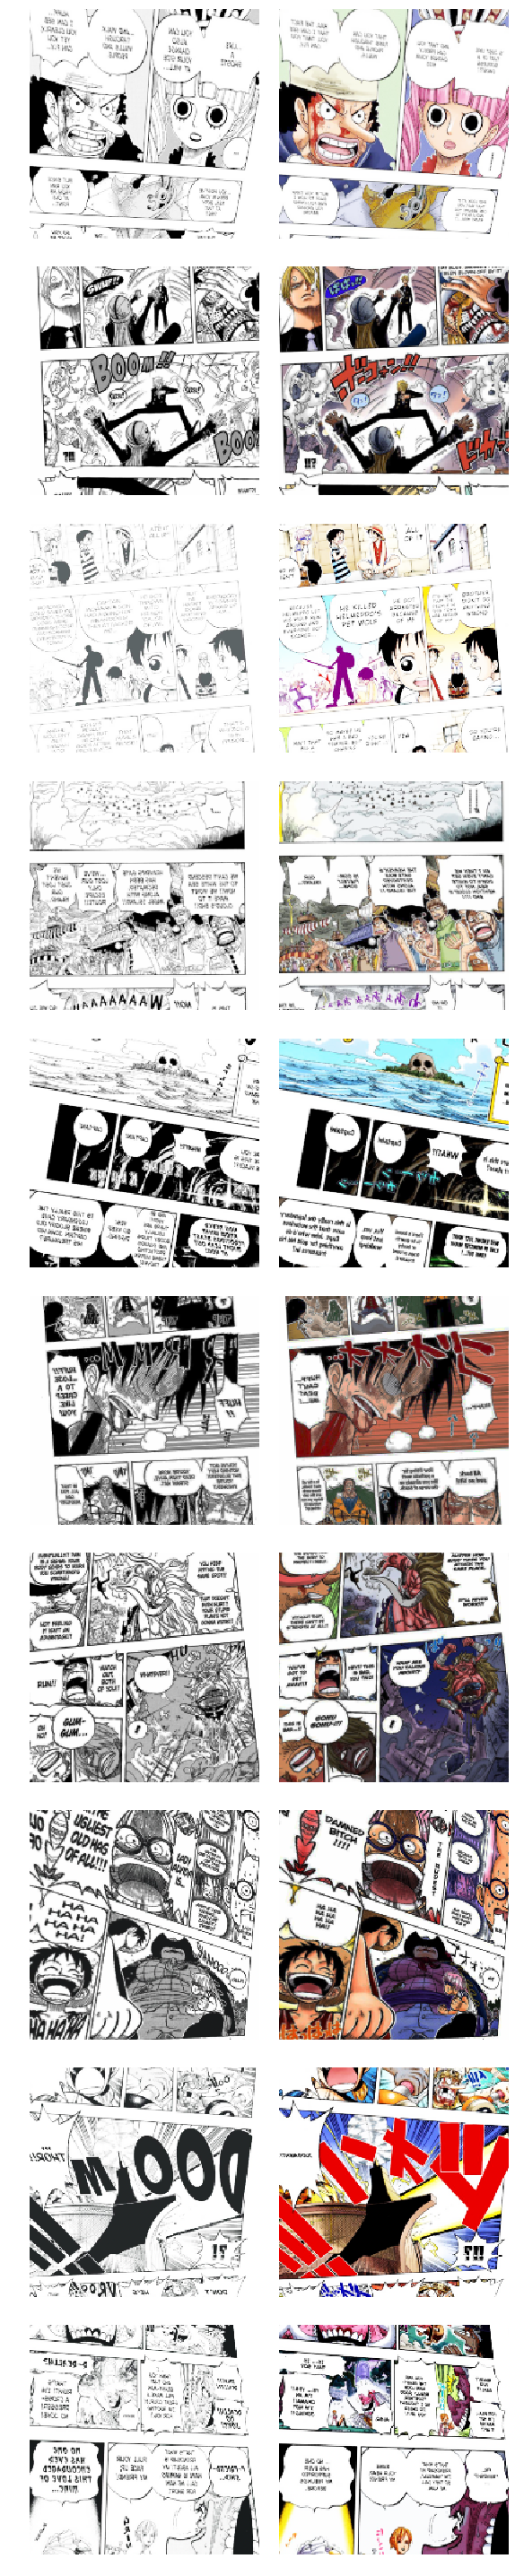

In [0]:
data_gen.show_batch(rows=10)

In [0]:
learn_gen = gen_learner_deep(data=data_gen, gen_loss=FeatureLoss(), nf_factor=nf_factor)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 26.6MB/s]


In [0]:
# learn_gen.callback_fns.append(partial(ImageGenTensorboardWriter, base_dir=TENSORBOARD_PATH, name='GenPre'))

In [0]:
docs(fit_one_cycle)

NameError: ignored

In [0]:
learn_gen.fit_one_cycle(1, pct_start=0.8, max_lr=slice(1e-3))

epoch,train_loss,valid_loss,time
0,4.631048,4.453769,36:01


In [0]:
learn_gen.unfreeze()

In [0]:
learn_gen.fit_one_cycle(1, pct_start=pct_start, max_lr=slice(5e-8,5e-5))

epoch,train_loss,valid_loss,time
0,4.561614,4.419706,42:52


In [0]:
learn_gen.save(path/pre_gen_name)

In [0]:
old_checkpoint_num = 0
checkpoint_num = old_checkpoint_num + 1
gen_old_checkpoint_name = gen_name + '_' + str(old_checkpoint_num)
gen_new_checkpoint_name = gen_name + '_' + str(checkpoint_num)
crit_old_checkpoint_name = crit_name + '_' + str(old_checkpoint_num)
crit_new_checkpoint_name= crit_name + '_' + str(checkpoint_num)

In [0]:
bs=8
sz=192

In [15]:
learn_gen = gen_learner_deep(data=data_gen, gen_loss=FeatureLoss(), nf_factor=nf_factor).load(path/pre_gen_name, with_opt=False)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 110MB/s] 


In [0]:
save_gen_images()

In [0]:
if old_checkpoint_num == 0:
  bs=64
  sz=128
  learn_gen=None
  gc.collect()
  data_crit = get_crit_data([name_gen, 'Colored'], bs=bs, sz=sz)
  data_crit.show_batch(rows=3, ds_type=DatasetType.Train, imgsize=3)
  learn_critic = colorize_crit_learner(data=data_crit, nf=256)
  # learn_critic.callback_fns.append(partial(LearnerTensorboardWriter, base_dir=TENSORBOARD_PATH, name='CriticPre'))
  learn_critic.fit_one_cycle(6, 1e-3)
  learn_critic.save(path/crit_old_checkpoint_name)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:215: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


epoch,train_loss,valid_loss,accuracy_thresh_expand,time


In [0]:
bs=16
sz=192

In [0]:
data_crit = get_crit_data([name_gen, 'Colored'], bs=bs, sz=sz)

In [0]:
data_crit.show_batch(rows=3, ds_type=DatasetType.Train, imgsize=3)

In [0]:
learn_critic = colorize_crit_learner(data=data_crit, nf=256).load(crit_old_checkpoint_name, with_opt=False)

In [0]:
learn_critic.fit_one_cycle(4, 1e-4)

In [0]:
learn_critic.save(path/crit_new_checkpoint_name)